## Analysis of Covid-19 Data in Python

### Introduction

COVID-19 has become a big deal globally since December 2019 and has effected many people if not all. This project shows the analyze of coronavirus from a mathematical and statistical perspective using Python. We are going to visualize the actual numbers and also make some simulations and estimations of the future development of the virus. This project does not give or try to give any expert opinion on the implications of the conclusions. 

### Data Acquisition and preparation
To start with, we need to find a reliable source of data. There are many institutions and websites out there that are offering most recent data of the infection on a global scale. Others are readily available in a usable format of csv while others may need web scrapping to get usable data. In this case, I have chosen to use [datasets](https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases) of Humanitarian Data Exchange. We will specifically download datasets for the number of infections, number of death and number of recoveries.  

For our use, we are going to download the first three files, which include data about confirmed cases, deaths and recoveries. We place them into the same directory of our Python script.

The two libraries that we are going to need are Pandas and Matplotlib. So we are going to import them now.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

After that we can load the CSV files into our script with Pandas and then display their structure.

In [7]:
confirmed = pd.read_csv(r"C:\Users\hp\Downloads\time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv(r"C:\Users\hp\Downloads\time_series_covid19_deaths_global.csv")
recovered = pd.read_csv(r"C:\Users\hp\Downloads\time_series_covid19_recovered_global.csv")

print(confirmed.head())

  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/27/20  7/28/20  7/29/20  \
0        0        0        0        0  ...    36263    36368    36471   
1        0        0        0        0  ...     4880     4997     5105   
2        0        0        0        0  ...    27973    28615    29229   
3        0        0        0        0  ...      907      907      918   
4        0        0        0        0  ...      950     1000     1078   

   7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  8/4/20  8/5/20  
0    36542    36675   36710   36710   36747   36782   

### Cleaning the Data
From the above output, we can see there are some initial columns including data like the country or the region and the province or the state. Then after the first four columns we have the dates and the respective confirmed cases (or deaths or recoveries) for that day.

For our case, we are going to clean up our data a little by dropping the ‘Province/State’ column and add up values of all rows of the same country. We are also going to get rid of the ‘Lat’ and the ‘Long’ columns, which are just latitudes and longitudes. Lastly, we are going to transpose the data frame. This simply means having the dates as rows and the countries as columns.

In [9]:
confirmed = confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1)
deaths = deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered = recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)

confirmed = confirmed.groupby(confirmed['Country/Region']).aggregate('sum')
deaths = deaths.groupby(deaths['Country/Region']).aggregate('sum')
recovered = recovered.groupby(recovered['Country/Region']).aggregate('sum')

confirmed = confirmed.T
deaths = deaths.T
recovered = recovered.T

### Key Figures Calculations
This data provides avenue for calculation of myriath things and a lot of insights. For our case we can calculate:

1. Death and recovery rate by country
2. Growth rate of both deaths and confirmed cases
3. Lastly we can calculate number of active cases by subtracting the deaths and recoveries from the confirmed cases

In [10]:
new_cases = confirmed.copy()

for day in range(1, len(confirmed)):
    new_cases.iloc[day] = confirmed.iloc[day] - confirmed.iloc[day - 1]
    
growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    growth_rate.iloc[day] = (new_cases.iloc[day] / confirmed.iloc[day - 1]) * 100
    
active_cases = confirmed.copy()

for day in range(0, len(confirmed)):
    active_cases.iloc[day] = confirmed.iloc[day] - deaths.iloc[day] - recovered.iloc[day]
    
overall_growth_rate = confirmed.copy()

for day in range(1, len(confirmed)):
    overall_growth_rate.iloc[day] = ((active_cases.iloc[day] - active_cases.iloc[day - 1]) / active_cases.iloc[day - 1]) * 100
    
death_rate = confirmed.copy()

for day in range(0, len(confirmed)):
    death_rate.iloc[day] = (deaths.iloc[day] / confirmed.iloc[day]) * 100

### Estimations
Another important thing we can do is make some estimations and then do further calculations based on them. These estimations don’t have to represent reality but just expert opinion or view. For instance, some experts say that 5% of coronavirus patients will experience severe symptoms and so may require hospital bed. Based on that number, we could calculate how much hospital beds will be needed over time and when the capacities of the individual countries will be exhausted.

In [12]:
hospitalization_rate_estimate = 0.05

hospitalization_needed = confirmed.copy()

for day in range(0, len(confirmed)):
    hospitalization_needed.iloc[day] = active_cases.iloc[day] * hospitalization_rate_estimate

The death rate increases when the capacities of the health care system are exhausted and eventually overwhelmed. Another reason for an increasing death rate in the statistics could be that way more people are infected than tested and confirmed. We could have ten times more cases than we know about. But we will almost certainly find out about every death. Thus the death rate in the statistics will be higher than in reality. Most experts say that COVID-19 has a death rate between 2-4% and we will work with this number. If that is true, we could use that number and reverse engineer the amount of actual infected people in countries like South Africa, Nigeria or Kenya which are the biggest economies in Africa and unfortunately the most affected. 

In [13]:
estimated_death_rate = 0.03
print(deaths['Kenya'].tail()[4] / estimated_death_rate)

15500.0


In this case we assume a mortality rate of 3% and the print statement gives us the estimated number of people that are actually infected.

### Data Visualization
We will now get our hands into visualizations part to see what this data actually looks like. First, we are going to plot the total confirmed cases for multiple countries.

No handles with labels found to put in legend.


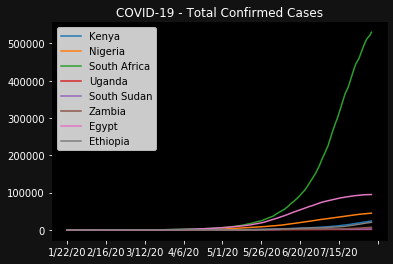

In [14]:
ax = plt.subplot()
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 - Total Confirmed Cases', color='white')
ax.legend(loc="upper left")

countries = ['Kenya', 'Nigeria', 'South Africa', 'Uganda', 'South Sudan', 'Zambia', 'Egypt', 'Ethiopia']

for country in countries:
    confirmed[country][0:].plot(label = country)

plt.legend(loc='upper left')
plt.show()

It is clear that from the above, there was barely any infections in Africa from January until May. The cases started going up in late May and South Africa's cases have bolted really fast in June. Only expert can say if this can happen across Africa and when this is likely to happen. I personally hope this may not be the case considering how fragile Africas' health systems are already struggling pre-covid. 

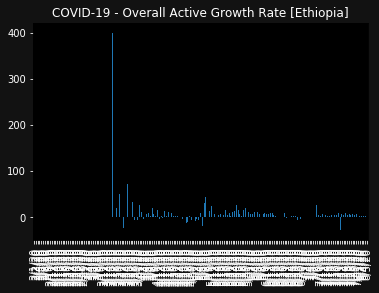

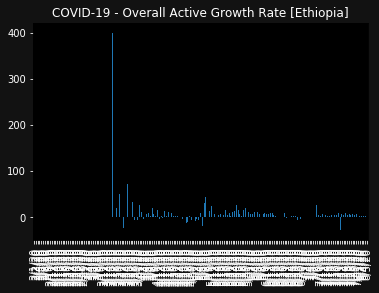

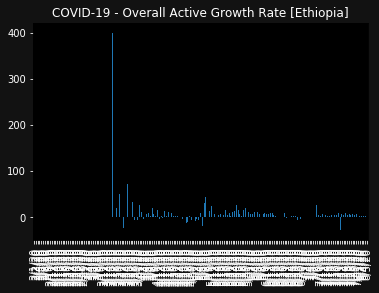

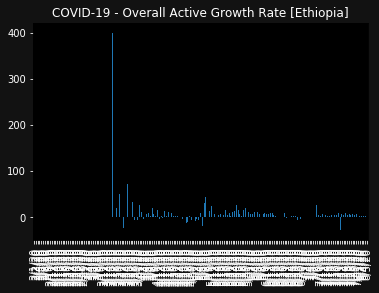

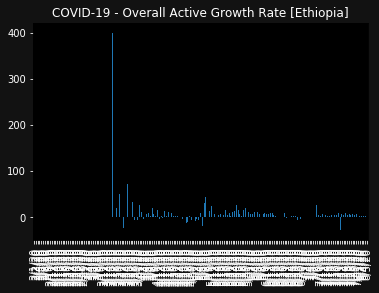

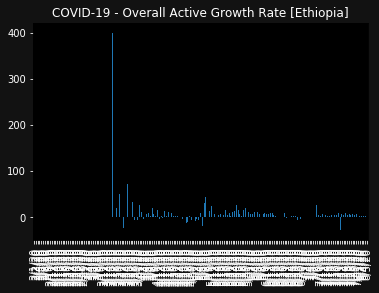

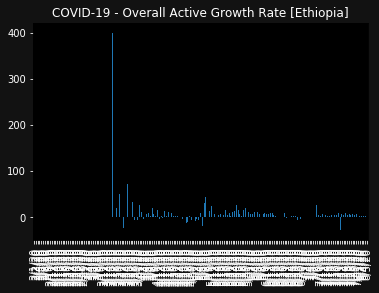

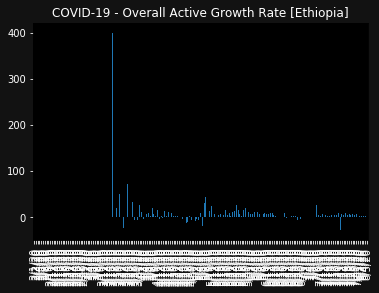

In [16]:
countries = ['South Africa', 'Nigeria', 'Kenya']

for countries in country:
    ax = plt.subplot()
    ax.set_facecolor('black')
    ax.figure.set_facecolor('#121212')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.set_title(f'COVID-19 - Overall Active Growth Rate [{country}]', color='white')
    overall_growth_rate[country][10:].plot.bar()
    plt.show()

Here we visualize the overall active cases growth rate. Meaning the growth rate of the confirmed cases minus the deaths and the recoveries. Notice that we start visualizing from day ten, in order to skip some of the initial days.

### Simulations
No country knows exactly what directions the infection is going to take but based on available data, simulations can be run to view the direction the infections might take. Let’s say we want to see what would happen if we had a constant growth rate of 12% in Kenya from today on. What would the next 30 days look like?

In [29]:
simulation_growth_rate = 0.07

dates = pd.date_range(start='8/17/2020', periods=30, freq='D')
dates = pd.Series(dates)
dates = dates.dt.strftime('%m/%d/%Y')

simulated = confirmed.copy()
simulated = simulated.append(pd.DataFrame(index=dates))

for day in range(len(confirmed), len(confirmed)+30):
    simulated.iloc[day] = simulated.iloc[day - 1] * (simulation_growth_rate + 1)

So, we set a fixed growth rate, create the dates for the next 30 days and then calculate the new cases based on a daily 12% increase. Lets visualize now using these parameters. 

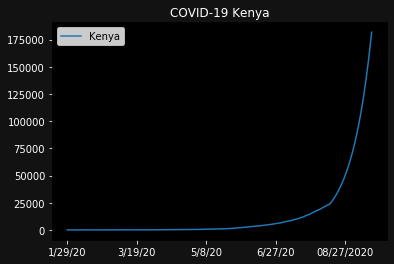

In [30]:
ax = simulated['Kenya'][7:].plot(label="Kenya")
ax.set_axisbelow(True)
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.set_title('COVID-19 Kenya', color='white')
ax.legend(loc="upper left")

plt.show()

From above, it looks like cases in Kenya will hit as high as 175k before end of August. This formula is blind to natural limits like population size and definitely doesn't put into account any counter-measure put in place. If we choose a higher infection rate like 15% or so, and run the simulation for a longer time, you will have more infected persons in Kenya than country's population. Therefore this simulation is not at all accurate. But we intend to improve it. 

### Conclusion
So who cares? Why is all of this even important? And what is the conclusion? Even though this analysis is not so complex in terms of potraying what covid-19 is, the data is quite concerning. If the growth rate remains high, the death rate will also increase because of dilapidated healthcare system in Africa. And since we have no vaccine or effective medicine yet, the only way to reduce the infection rate is our behavior. The golden rule to help 'flatten the curve': SANITIZE, WEAR MASK AND KEEP SOCIAL DISTANCE and STAY HOME.